# Processamento dos dados


In [ ]:
%%time
# Carregamento das bibliotecas a serem utilizadas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 21.7 µs


## 1. Dataset Grade Diária

### 1.1 Carregamento do dataset

In [ ]:
%%time
# Carregamento do dataset "Grade Diária" Anonimizado.
dataset_gradediaria = pd.read_csv("/content/drive/MyDrive/dataset/grade_diaria_anonimizado.csv")
dataset_gradediaria.head(5)

CPU times: user 243 ms, sys: 31.2 ms, total: 274 ms
Wall time: 526 ms


,Praça,Data,Faixa Horária,Emissora A,Emissora B,Emissora C
0,praca_0,6/1/2020,06:00 - 06:05,programa_0 / JORNALISMO,programa_b_0 / RELIGIOSO,programa_c_0 / JORNALISMO
1,praca_0,6/1/2020,06:05 - 06:10,programa_0 / JORNALISMO,programa_b_0 / RELIGIOSO,programa_c_0 / JORNALISMO
2,praca_0,6/1/2020,06:10 - 06:15,programa_0 / JORNALISMO,programa_b_0 / RELIGIOSO,programa_c_0 / JORNALISMO
3,praca_0,6/1/2020,06:15 - 06:20,programa_0 / JORNALISMO,programa_b_0 / RELIGIOSO,programa_c_0 / JORNALISMO
4,praca_0,6/1/2020,06:20 - 06:25,programa_0 / JORNALISMO,programa_b_0 / RELIGIOSO,programa_c_0 / JORNALISMO


### 1.2 Transformação da Coluna 'Faixa Horária' em 'Hora Início' 

In [ ]:
%%time
# Função que transforma elementos da coluna "Faixa Horária" para o padrão "HH:MM:SS"
def transforma_faixa_h(faixa_h):
  lista_h = faixa_h.split(' - ')
  horario_principal = lista_h[0]
  horario_principal = horario_principal + ':00'
  return horario_principal

# Aplicação da função referenciada acima, na coluna "Faixa Horária" - Criação de uma nova coluna "Hora Início"
dataset_gradediaria['Hora Início'] = dataset_gradediaria['Faixa Horária'].apply(transforma_faixa_h)
dataset_gradediaria.tail()

CPU times: user 146 ms, sys: 12 ms, total: 158 ms
Wall time: 163 ms


,Praça,Data,Faixa Horária,Emissora A,Emissora B,Emissora C,Hora Início,Programa,Categoria
218875,praca_0,2022-06-30,29:35 - 29:40,programa_18 / JORNALISMO,programa_b_20 / RELIGIOSO,programa_c_21 / JORNALISMO,29:35:00,programa_18,JORNALISMO
218876,praca_0,2022-06-30,29:40 - 29:45,programa_18 / JORNALISMO,programa_b_20 / RELIGIOSO,programa_c_21 / JORNALISMO,29:40:00,programa_18,JORNALISMO
218877,praca_0,2022-06-30,29:45 - 29:50,programa_18 / JORNALISMO,programa_b_20 / RELIGIOSO,programa_c_21 / JORNALISMO,29:45:00,programa_18,JORNALISMO
218878,praca_0,2022-06-30,29:50 - 29:55,programa_18 / JORNALISMO,programa_b_20 / RELIGIOSO,programa_c_21 / JORNALISMO,29:50:00,programa_18,JORNALISMO
218879,praca_0,2022-06-30,29:55 - 30:00,programa_18 / JORNALISMO,programa_b_20 / RELIGIOSO,programa_c_21 / JORNALISMO,29:55:00,programa_18,JORNALISMO


### 1.3 Conversão de tipos da coluna 'Data'
Conversão da coluna 'Data' para o tipo 'datetime'

In [ ]:
%%time

dataset_gradediaria['Data'] = dataset_gradediaria['Data'].apply(pd.to_datetime)

CPU times: user 1.24 s, sys: 29 ms, total: 1.27 s
Wall time: 1.28 s


### 1.4 Derivação dos Atributos 'Programa' e 'Categoria'

In [ ]:
%%time
dataset_gradediaria[['Programa','Categoria']] = dataset_gradediaria['Emissora A'].str.split(' / ', expand=True)

CPU times: user 690 ms, sys: 27.9 ms, total: 718 ms
Wall time: 718 ms


### 1.5 Salvamento dos dados

In [ ]:
%%time
dataset_gradediaria.to_csv('Grade Diária Final.csv')

CPU times: user 2.18 s, sys: 61.1 ms, total: 2.25 s
Wall time: 2.26 s


## 2. Dataset Emissora A

### 2.1 Carregamento dos Dados

In [ ]:
%%time
emissora_a_semana = pd.read_csv('/content/drive/MyDrive/dataset/Emissora A - Seg a Sex.csv')
emissora_a_sab = pd.read_csv('/content/drive/MyDrive/dataset/Emissora A - Sáb.csv')
emissora_a_dom = pd.read_csv('/content/drive/MyDrive/dataset/Emissora A - Dom.csv')

CPU times: user 1.89 s, sys: 88 ms, total: 1.98 s
Wall time: 3.59 s


### 2.2 Concatenação das tabelas dos Dias da Semana - Emissora A

In [ ]:
%%time
emissora_a_geral = pd.concat([emissora_a_semana,emissora_a_sab,emissora_a_dom])

CPU times: user 346 ms, sys: 3.85 ms, total: 350 ms
Wall time: 371 ms


### 2.3 Conversão da Coluna 'Data' para o tipo 'datetime'

In [ ]:
%%time
emissora_a_geral['Data'] = emissora_a_geral['Data'].apply(pd.to_datetime)
emissora_a_geral.tail()

CPU times: user 18.3 s, sys: 60 ms, total: 18.4 s
Wall time: 18.4 s


,Unnamed: 0,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,...,DE | Fid%,Masculino | Fid%,Feminino | Fid%,4-11 anos | Fid%,12-17 anos | Fid%,18-24 anos | Fid%,25-34 anos | Fid%,35-49 anos | Fid%,50-59 anos | Fid%,60+ anos | Fid%
31099,31099,2022-06-26,29:35:00,Domingo,3.37,1.42,0.00,2.06,0.89,0.63,...,100.0,79.31,92.24,0.0,0.0,0.00,0.0,100.0,68.45,84.34
31100,31100,2022-06-26,29:40:00,Domingo,3.31,1.42,0.00,1.93,0.89,0.80,...,100.0,100.00,100.00,0.0,0.0,0.00,0.0,100.0,100.00,100.00
31101,31101,2022-06-26,29:45:00,Domingo,3.62,1.90,0.00,2.29,0.89,1.14,...,100.0,93.04,93.25,0.0,0.0,71.26,0.0,100.0,100.00,100.00
31102,31102,2022-06-26,29:50:00,Domingo,4.02,1.78,0.52,2.53,0.89,1.28,...,100.0,71.81,100.00,0.0,0.0,77.48,40.0,100.0,100.00,100.00
31103,31103,2022-06-26,29:55:00,Domingo,4.72,1.90,1.29,3.10,0.89,1.69,...,100.0,95.19,91.58,0.0,60.0,88.74,100.0,100.0,100.00,100.00


### 2.4 Ordenamento da tabela "emissora_a_geral" pelas colunas "Data" e "Hora Início"

A fim de seguir fielmente a grade elencada pela emissora, utilizamos essas colunas ("Data" e "Hora Início") para a definição da ordem ao invés de seguir pela ordem alfabética e alterar a grade horária da programação.

In [ ]:
%%time
emissora_a_geral = emissora_a_geral.sort_values(by=['Data', 'Hora Início'])
emissora_a_geral.tail()

CPU times: user 157 ms, sys: 2.88 ms, total: 160 ms
Wall time: 176 ms


,Unnamed: 0,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,...,DE | Fid%,Masculino | Fid%,Feminino | Fid%,4-11 anos | Fid%,12-17 anos | Fid%,18-24 anos | Fid%,25-34 anos | Fid%,35-49 anos | Fid%,50-59 anos | Fid%,60+ anos | Fid%
156667,156667,2022-06-30,29:35:00,Quinta,1.67,0.30,0.41,1.03,0.53,0.17,...,60.0,100.00,72.93,0.0,100.0,20.0,0.0,100.00,0.0,60.00
156668,156668,2022-06-30,29:40:00,Quinta,1.97,0.30,0.41,1.45,0.35,0.17,...,40.0,100.00,85.20,0.0,100.0,100.0,0.0,100.00,0.0,40.00
156669,156669,2022-06-30,29:45:00,Quinta,2.22,0.30,0.41,1.45,0.88,0.17,...,100.0,100.00,100.00,0.0,100.0,100.0,0.0,100.00,0.0,100.00
156670,156670,2022-06-30,29:50:00,Quinta,2.71,0.54,0.41,1.81,0.88,0.37,...,100.0,73.76,85.57,0.0,100.0,100.0,0.0,77.78,0.0,80.11
156671,156671,2022-06-30,29:55:00,Quinta,3.60,0.90,0.41,2.50,0.88,0.51,...,100.0,100.00,97.02,0.0,100.0,100.0,0.0,100.00,80.0,100.00


### 2.5 Salvamento da Tabela Agregada

In [ ]:
%%time
emissora_a_geral.to_csv("Emissora A Segunda a Domingo.csv")

CPU times: user 9.91 s, sys: 574 ms, total: 10.5 s
Wall time: 12 s


## 3. Dataset "Emissora A" e "Grade Diária"

### 3.1 Agregação (Merge) das duas tabelas Manipuladas: "Grade Diária" e "Emissora A"

In [ ]:
%%time
tabela_programacao = pd.merge(emissora_a_geral, dataset_gradediaria, how="left", left_on=['Data','Hora Início'], right_on=['Data','Hora Início'])
tabela_programacao.tail()
tabela_programacao.columns

CPU times: user 299 ms, sys: 21.1 ms, total: 320 ms
Wall time: 339 ms


Index(['Unnamed: 0', 'Data', 'Hora Início', 'Dia da Semana',
       'Total Domicílios | Rat%', 'AB | Rat%', 'C1 | Rat%', 'C2 | Rat%',
       'DE | Rat%', 'Masculino | Rat%', 'Feminino | Rat%', '4-11 anos | Rat%',
       '12-17 anos | Rat%', '18-24 anos | Rat%', '25-34 anos | Rat%',
       '35-49 anos | Rat%', '50-59 anos | Rat%', '60+ anos | Rat%',
       'Total Domicílios | Shr%', 'AB | Shr%', 'C1 | Shr%', 'C2 | Shr%',
       'DE | Shr%', 'Masculino | Shr%', 'Feminino | Shr%', '4-11 anos | Shr%',
       '12-17 anos | Shr%', '18-24 anos | Shr%', '25-34 anos | Shr%',
       '35-49 anos | Shr%', '50-59 anos | Shr%', '60+ anos | Shr%',
       'Total Indivíduos | Rch%', 'AB | Rch%', 'C1 | Rch%', 'C2 | Rch%',
       'DE | Rch%', 'Masculino | Rch%', 'Feminino | Rch%', '4-11 anos | Rch%',
       '12-17 anos | Rch%', '18-24 anos | Rch%', '25-34 anos | Rch%',
       '35-49 anos | Rch%', '50-59 anos | Rch%', '60+ anos | Rch%',
       'Total Indivíduos | Fid%', 'AB | Fid%', 'C1 | Fid%', 'C2 | Fid

### 3.2 Limpeza de dados
Aqui incluimos todos os dados que não vamos utilizar para serem removidos da tabela


In [ ]:
%%time
tabela_programacao.drop(['Unnamed: 0',
       'Total Indivíduos | Rch%', 'AB | Rch%', 'C1 | Rch%', 'C2 | Rch%',
       'DE | Rch%', 'Masculino | Rch%', 'Feminino | Rch%', '4-11 anos | Rch%',
       '12-17 anos | Rch%', '18-24 anos | Rch%', '25-34 anos | Rch%',
       '35-49 anos | Rch%', '50-59 anos | Rch%', '60+ anos | Rch%', 'Praça',
       'Faixa Horária', 'Emissora A', 'Emissora B',
       'Emissora C', 'Programa'], inplace=True, axis=1)
tabela_programacao.tail()

CPU times: user 144 ms, sys: 117 ms, total: 262 ms
Wall time: 545 ms


,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,...,Masculino | Fid%,Feminino | Fid%,4-11 anos | Fid%,12-17 anos | Fid%,18-24 anos | Fid%,25-34 anos | Fid%,35-49 anos | Fid%,50-59 anos | Fid%,60+ anos | Fid%,Categoria
218875,2022-06-30,29:35:00,Quinta,1.67,0.30,0.41,1.03,0.53,0.17,0.92,...,100.00,72.93,0.0,100.0,20.0,0.0,100.00,0.0,60.00,JORNALISMO
218876,2022-06-30,29:40:00,Quinta,1.97,0.30,0.41,1.45,0.35,0.17,1.07,...,100.00,85.20,0.0,100.0,100.0,0.0,100.00,0.0,40.00,JORNALISMO
218877,2022-06-30,29:45:00,Quinta,2.22,0.30,0.41,1.45,0.88,0.17,1.26,...,100.00,100.00,0.0,100.0,100.0,0.0,100.00,0.0,100.00,JORNALISMO
218878,2022-06-30,29:50:00,Quinta,2.71,0.54,0.41,1.81,0.88,0.37,1.42,...,73.76,85.57,0.0,100.0,100.0,0.0,77.78,0.0,80.11,JORNALISMO
218879,2022-06-30,29:55:00,Quinta,3.60,0.90,0.41,2.50,0.88,0.51,1.89,...,100.00,97.02,0.0,100.0,100.0,0.0,100.00,80.0,100.00,JORNALISMO


#### 3.2.1 Listagem das categorias existentes

Primeiramente, foi aplicado a função unique( ) para visualizar todos os valores presentes da coluna categoria e facilitar a localização do valor que queremos remover, o "Não consta".

In [ ]:
%%time
tabela_programacao['Categoria'].unique()

CPU times: user 23 ms, sys: 1 ms, total: 24 ms
Wall time: 40.7 ms


array(['JORNALISMO', 'AUDITORIO', 'FILME', 'NOVELA', 'SERIES',
       'ENTREVISTA', 'REALITY SHOW', 'HUMORISTICO', 'REPORTAGEM',
       'EDUCATIVO', 'FEMININO', 'SHOW', 'MUSICAL', 'RELIGIOSO', 'RURAL',
       'CARROS E MOTORES', 'ESPORTE', 'FUTEBOL', 'DOCUMENTARIO', 'OUTROS',
       'POLITICO', 'DEBATE', 'SORTEIO', 'MINISSERIE', 'PREMIACAO',
       'CULINARIO', 'GAME SHOW', 'TELE VENDAS', 'NAO CONSTA'],
      dtype=object)

#### 3.2.2 Remoção de valores vazios/nulos ou não categorizados da tabela
Utilizamos a função drop( ) para remover valores categóricos "Não consta", pois representam ausencia da transmissão e, consequentemente, consideramos o descarte. Incluímos também o inplace=True para substituir definitivamente ao invés de criar uma cópia.

In [ ]:
%%time
tabela_programacao.dropna()

tabela_programacao.drop(tabela_programacao.index[tabela_programacao['Categoria'] == 'NAO CONSTA'], inplace=True)

tabela_programacao.tail()

CPU times: user 203 ms, sys: 5.86 ms, total: 209 ms
Wall time: 234 ms


,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,...,Masculino | Fid%,Feminino | Fid%,4-11 anos | Fid%,12-17 anos | Fid%,18-24 anos | Fid%,25-34 anos | Fid%,35-49 anos | Fid%,50-59 anos | Fid%,60+ anos | Fid%,Categoria
218875,2022-06-30,29:35:00,Quinta,1.67,0.30,0.41,1.03,0.53,0.17,0.92,...,100.00,72.93,0.0,100.0,20.0,0.0,100.00,0.0,60.00,JORNALISMO
218876,2022-06-30,29:40:00,Quinta,1.97,0.30,0.41,1.45,0.35,0.17,1.07,...,100.00,85.20,0.0,100.0,100.0,0.0,100.00,0.0,40.00,JORNALISMO
218877,2022-06-30,29:45:00,Quinta,2.22,0.30,0.41,1.45,0.88,0.17,1.26,...,100.00,100.00,0.0,100.0,100.0,0.0,100.00,0.0,100.00,JORNALISMO
218878,2022-06-30,29:50:00,Quinta,2.71,0.54,0.41,1.81,0.88,0.37,1.42,...,73.76,85.57,0.0,100.0,100.0,0.0,77.78,0.0,80.11,JORNALISMO
218879,2022-06-30,29:55:00,Quinta,3.60,0.90,0.41,2.50,0.88,0.51,1.89,...,100.00,97.02,0.0,100.0,100.0,0.0,100.00,80.0,100.00,JORNALISMO


### 3.3 Derivação de novos atributos "Mês" e "Dia" a partir da coluna "Data"

Aqui formamos novas colunas "mês" e "dia" e retornamos esses valores de strings formatadas em data (date_format)

In [ ]:
%%time
tabela_programacao['Mês'] = tabela_programacao['Data'].dt.strftime("%m")
tabela_programacao['Dia'] = tabela_programacao['Data'].dt.strftime("%d")
tabela_programacao['Ano'] = tabela_programacao['Data'].dt.strftime("%Y")
tabela_programacao.tail()

CPU times: user 3.13 s, sys: 29.1 ms, total: 3.16 s
Wall time: 3.17 s


,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,...,12-17 anos | Fid%,18-24 anos | Fid%,25-34 anos | Fid%,35-49 anos | Fid%,50-59 anos | Fid%,60+ anos | Fid%,Categoria,Mês,Dia,Ano
218875,2022-06-30,29:35:00,Quinta,1.67,0.30,0.41,1.03,0.53,0.17,0.92,...,100.0,20.0,0.0,100.00,0.0,60.00,JORNALISMO,06,30,2022
218876,2022-06-30,29:40:00,Quinta,1.97,0.30,0.41,1.45,0.35,0.17,1.07,...,100.0,100.0,0.0,100.00,0.0,40.00,JORNALISMO,06,30,2022
218877,2022-06-30,29:45:00,Quinta,2.22,0.30,0.41,1.45,0.88,0.17,1.26,...,100.0,100.0,0.0,100.00,0.0,100.00,JORNALISMO,06,30,2022
218878,2022-06-30,29:50:00,Quinta,2.71,0.54,0.41,1.81,0.88,0.37,1.42,...,100.0,100.0,0.0,77.78,0.0,80.11,JORNALISMO,06,30,2022
218879,2022-06-30,29:55:00,Quinta,3.60,0.90,0.41,2.50,0.88,0.51,1.89,...,100.0,100.0,0.0,100.00,80.0,100.00,JORNALISMO,06,30,2022


### 3.4 Conversão das Colunas para o tipo "Number"
Transformação necessária para a utilização dos inputs, no modelo, posteriormente. 

In [ ]:
%%time
dicionario_hora = {'06:00:00': 6, '06:05:00': 6, '06:10:00': 6, '06:15:00': 6.25, '06:20:00': 6.25, '06:25:00': 6.25, '06:30:00': 6.5, '06:35:00': 6.5, '06:40:00': 6.5, '06:45:00': 6.75, '06:50:00': 6.75, '06:55:00': 6.75, '07:00:00': 7, '07:05:00': 7, '07:10:00': 7, '07:15:00': 7.25, '07:20:00': 7.25, '07:25:00': 7.25, '07:30:00': 7.5, '07:35:00': 7.5, '07:40:00': 7.5, '07:45:00': 7.75, '07:50:00': 7.75, '07:55:00': 7.75, '08:00:00': 8, '08:05:00': 8, '08:10:00': 8, '08:15:00': 8.25, '08:20:00': 8.25, '08:25:00': 8.25, '08:30:00': 8.5, '08:35:00': 8.5, '08:40:00': 8.5, '08:45:00': 8.75, '08:50:00': 8.75, '08:55:00': 8.75, '09:00:00': 9, '09:05:00': 9, '09:10:00': 9, '09:15:00': 9.25, '09:20:00': 9.25, '09:25:00': 9.25, '09:30:00': 9.5, '09:35:00': 9.5, '09:40:00': 9.5, '09:45:00': 9.75, '09:50:00': 9.75, '09:55:00': 9.75, '10:00:00': 10, '10:05:00': 10, '10:10:00': 10, '10:15:00': 10.25, '10:20:00': 10.25, '10:25:00': 10.25, '10:30:00': 10.5, '10:35:00': 10.5, '10:40:00': 10.5, '10:45:00': 10.75, '10:50:00': 10.75, '10:55:00': 10.75, '11:00:00': 11, '11:05:00': 11, '11:10:00': 11, '11:15:00': 11.25, '11:20:00': 11.25, '11:25:00': 11.25, '11:30:00': 11.5, '11:35:00': 11.5, '11:40:00': 11.5, '11:45:00': 11.75, '11:50:00': 11.75, '11:55:00': 11.75, '12:00:00': 12, '12:05:00': 12, '12:10:00': 12, '12:15:00': 12.25, '12:20:00': 12.25, '12:25:00': 12.25, '12:30:00': 12.5, '12:35:00': 12.5, '12:40:00': 12.5, '12:45:00': 12.75, '12:50:00': 12.75, '12:55:00': 12.75, '13:00:00': 13, '13:05:00': 13, '13:10:00': 13, '13:15:00': 13.25, '13:20:00': 13.25, '13:25:00': 13.25, '13:30:00': 13.5, '13:35:00': 13.5, '13:40:00': 13.5, '13:45:00': 13.75, '13:50:00': 13.75, '13:55:00': 13.75, '14:00:00': 14, '14:05:00': 14, '14:10:00': 14, '14:15:00': 14.25, '14:20:00': 14.25, '14:25:00': 14.25, '14:30:00': 14.5, '14:35:00': 14.5, '14:40:00': 14.5, '14:45:00': 14.75, '14:50:00': 14.75, '14:55:00': 14.75, '15:00:00': 15, '15:05:00': 15, '15:10:00': 15, '15:15:00': 15.25, '15:20:00': 15.25, '15:25:00': 15.25, '15:30:00': 15.5, '15:35:00': 15.5, '15:40:00': 15.5, '15:45:00': 15.75, '15:50:00': 15.75, '15:55:00': 15.75, '16:00:00': 16, '16:05:00': 16, '16:10:00': 16, '16:15:00': 16.25, '16:20:00': 16.25, '16:25:00': 16.25, '16:30:00': 16.5, '16:35:00': 16.5, '16:40:00': 16.5, '16:45:00': 16.75, '16:50:00': 16.75, '16:55:00': 16.75, '17:00:00': 17, '17:05:00': 17, '17:10:00': 17, '17:15:00': 17.25, '17:20:00': 17.25, '17:25:00': 17.25, '17:30:00': 17.5, '17:35:00': 17.5, '17:40:00': 17.5, '17:45:00': 17.75, '17:50:00': 17.75, '17:55:00': 17.75, '18:00:00': 18, '18:05:00': 18, '18:10:00': 18, '18:15:00': 18.25, '18:20:00': 18.25, '18:25:00': 18.25, '18:30:00': 18.5, '18:35:00': 18.5, '18:40:00': 18.5, '18:45:00': 18.75, '18:50:00': 18.75, '18:55:00': 18.75, '19:00:00': 19, '19:05:00': 19, '19:10:00': 19, '19:15:00': 19.25, '19:20:00': 19.25, '19:25:00': 19.25, '19:30:00': 19.5, '19:35:00': 19.5, '19:40:00': 19.5, '19:45:00': 19.75, '19:50:00': 19.75, '19:55:00': 19.75, '20:00:00': 20, '20:05:00': 20, '20:10:00': 20, '20:15:00': 20.25, '20:20:00': 20.25, '20:25:00': 20.25, '20:30:00': 20.5, '20:35:00': 20.5, '20:40:00': 20.5, '20:45:00': 20.75, '20:50:00': 20.75, '20:55:00': 20.75, '21:00:00': 21, '21:05:00': 21, '21:10:00': 21, '21:15:00': 21.25, '21:20:00': 21.25, '21:25:00': 21.25, '21:30:00': 21.5, '21:35:00': 21.5, '21:40:00': 21.5, '21:45:00': 21.75, '21:50:00': 21.75, '21:55:00': 21.75, '22:00:00': 22, '22:05:00': 22, '22:10:00': 22, '22:15:00': 22.25, '22:20:00': 22.25, '22:25:00': 22.25, '22:30:00': 22.5, '22:35:00': 22.5, '22:40:00': 22.5, '22:45:00': 22.75, '22:50:00': 22.75, '22:55:00': 22.75, '23:00:00': 23, '23:05:00': 23, '23:10:00': 23, '23:15:00': 23.25, '23:20:00': 23.25, '23:25:00': 23.25, '23:30:00': 23.5, '23:35:00': 23.5, '23:40:00': 23.5, '23:45:00': 23.75, '23:50:00': 23.75, '23:55:00': 23.75, '24:00:00': 24, '24:05:00': 24, '24:10:00': 24, '24:15:00': 24.25, '24:20:00': 24.25, '24:25:00': 24.25, '24:30:00': 24.5, '24:35:00': 24.5, '24:40:00': 24.5, '24:45:00': 24.75, '24:50:00': 24.75, '24:55:00': 24.75, '25:00:00': 25, '25:05:00': 25, '25:10:00': 25, '25:15:00': 25.25, '25:20:00': 25.25, '25:25:00': 25.25, '25:30:00': 25.5, '25:35:00': 25.5, '25:40:00': 25.5, '25:45:00': 25.75, '25:50:00': 25.75, '25:55:00': 25.75, '26:00:00': 26, '26:05:00': 26, '26:10:00': 26, '26:15:00': 26.25, '26:20:00': 26.25, '26:25:00': 26.25, '26:30:00': 26.5, '26:35:00': 26.5, '26:40:00': 26.5, '26:45:00': 26.75, '26:50:00': 26.75, '26:55:00': 26.75, '27:00:00': 27, '27:05:00': 27, '27:10:00': 27, '27:15:00': 27.25, '27:20:00': 27.25, '27:25:00': 27.25, '27:30:00': 27.5, '27:35:00': 27.5, '27:40:00': 27.5, '27:45:00': 27.75, '27:50:00': 27.75, '27:55:00': 27.75, '28:00:00': 28, '28:05:00': 28, '28:10:00': 28, '28:15:00': 28.25, '28:20:00': 28.25, '28:25:00': 28.25, '28:30:00': 28.5, '28:35:00': 28.5, '28:40:00': 28.5, '28:45:00': 28.75, '28:50:00': 28.75, '28:55:00': 28.75, '29:00:00': 29, '29:05:00': 29, '29:10:00': 29, '29:15:00': 29.25, '29:20:00': 29.25, '29:25:00': 29.25, '29:30:00': 29.5, '29:35:00': 29.5, '29:40:00': 29.5, '29:45:00': 29.75, '29:50:00': 29.75, '29:55:00': 29.75}

dicionario_dia_semana = {"Domingo":0,"Segunda":1,"Terça":2,"Quarta":3,"Quinta":4,"Sexta":5,"Sábado":6}

CPU times: user 37 µs, sys: 0 ns, total: 37 µs
Wall time: 43.4 µs


In [ ]:
%%time
tabela_convertido = tabela_programacao.replace({"Hora Início":dicionario_hora, "Dia da Semana": dicionario_dia_semana})
tabela_convertido.tail()

CPU times: user 2.22 s, sys: 24.2 ms, total: 2.24 s
Wall time: 2.24 s


,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,...,12-17 anos | Fid%,18-24 anos | Fid%,25-34 anos | Fid%,35-49 anos | Fid%,50-59 anos | Fid%,60+ anos | Fid%,Categoria,Mês,Dia,Ano
218875,2022-06-30,29.50,4,1.67,0.30,0.41,1.03,0.53,0.17,0.92,...,100.0,20.0,0.0,100.00,0.0,60.00,JORNALISMO,06,30,2022
218876,2022-06-30,29.50,4,1.97,0.30,0.41,1.45,0.35,0.17,1.07,...,100.0,100.0,0.0,100.00,0.0,40.00,JORNALISMO,06,30,2022
218877,2022-06-30,29.75,4,2.22,0.30,0.41,1.45,0.88,0.17,1.26,...,100.0,100.0,0.0,100.00,0.0,100.00,JORNALISMO,06,30,2022
218878,2022-06-30,29.75,4,2.71,0.54,0.41,1.81,0.88,0.37,1.42,...,100.0,100.0,0.0,77.78,0.0,80.11,JORNALISMO,06,30,2022
218879,2022-06-30,29.75,4,3.60,0.90,0.41,2.50,0.88,0.51,1.89,...,100.0,100.0,0.0,100.00,80.0,100.00,JORNALISMO,06,30,2022


### 3.5 Utilização do Método One-Hot-Encoding para tratar os dados categorizados (Categoria)

Utilizamos o método One Hot Encoding  para converter as linhas categóricas em colunas e para passar o quadro de dados para a função get_dummies( ) atrelada ao método One Hot Enconding. Também foi incluído o drop_first para remover apenas a primeira linha categórica de nome "categoria".

In [ ]:
%%time
tabela_convertido = pd.get_dummies(tabela_convertido,columns=['Categoria'], drop_first=True)
tabela_convertido.tail()

CPU times: user 388 ms, sys: 7.98 ms, total: 396 ms
Wall time: 398 ms


,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,...,Categoria_POLITICO,Categoria_PREMIACAO,Categoria_REALITY SHOW,Categoria_RELIGIOSO,Categoria_REPORTAGEM,Categoria_RURAL,Categoria_SERIES,Categoria_SHOW,Categoria_SORTEIO,Categoria_TELE VENDAS
218875,2022-06-30,29.50,4,1.67,0.30,0.41,1.03,0.53,0.17,0.92,...,0,0,0,0,0,0,0,0,0,0
218876,2022-06-30,29.50,4,1.97,0.30,0.41,1.45,0.35,0.17,1.07,...,0,0,0,0,0,0,0,0,0,0
218877,2022-06-30,29.75,4,2.22,0.30,0.41,1.45,0.88,0.17,1.26,...,0,0,0,0,0,0,0,0,0,0
218878,2022-06-30,29.75,4,2.71,0.54,0.41,1.81,0.88,0.37,1.42,...,0,0,0,0,0,0,0,0,0,0
218879,2022-06-30,29.75,4,3.60,0.90,0.41,2.50,0.88,0.51,1.89,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
%%time
tabela_convertido['Dia'] = tabela_convertido['Dia'].astype('int')
tabela_convertido['Mês'] = tabela_convertido['Mês'].astype('int')

CPU times: user 66.8 ms, sys: 1.04 ms, total: 67.9 ms
Wall time: 70 ms


## 4. Dataset "Feriados"

### 4.1 Carregamento dos dados

In [ ]:
%%time
dataset_feriados = pd.read_csv("/content/drive/MyDrive/dataset/Feriados.csv")
dataset_feriados.head()

CPU times: user 6.19 ms, sys: 50 µs, total: 6.24 ms
Wall time: 9.66 ms


,Data,Feriado,Ano
0,01/01/2019,Confraternização Universal,2019
1,04/03/2019,Carnaval,2019
2,05/03/2019,Carnaval,2019
3,19/04/2019,Paixão de Cristo,2019
4,21/04/2019,Tiradentes,2019


### 4.2 Conversão da coluna 'Data' para o tipo 'datetime'

In [ ]:
%%time
dataset_feriados["Data"] = dataset_feriados["Data"].apply(pd.to_datetime)
dataset_feriados.head()

CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 255 ms


,Data,Feriado,Ano
0,2019-01-01,Confraternização Universal,2019
1,2019-04-03,Carnaval,2019
2,2019-05-03,Carnaval,2019
3,2019-04-19,Paixão de Cristo,2019
4,2019-04-21,Tiradentes,2019


### 4.3 Agregação (Merge) da tabela "Feriados" com a tabela "Emissora A", pelo método "left"

In [ ]:
%%time
tabela_convertido = pd.merge(tabela_convertido, dataset_feriados, how="left", left_on=["Data"], right_on=["Data"])

CPU times: user 108 ms, sys: 28 µs, total: 108 ms
Wall time: 109 ms


### 4.4 Conversão da coluna "Feriado" para Booleano(True/False) no tipo "int"

In [ ]:
%%time
tabela_convertido["Feriado"] = tabela_convertido["Feriado"].notnull().astype('int')
tabela_convertido.tail()

CPU times: user 13.2 ms, sys: 1.01 ms, total: 14.2 ms
Wall time: 14.9 ms


,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,...,Categoria_REALITY SHOW,Categoria_RELIGIOSO,Categoria_REPORTAGEM,Categoria_RURAL,Categoria_SERIES,Categoria_SHOW,Categoria_SORTEIO,Categoria_TELE VENDAS,Feriado,Ano_y
218863,2022-06-30,29.50,4,1.67,0.30,0.41,1.03,0.53,0.17,0.92,...,0,0,0,0,0,0,0,0,0,NaN
218864,2022-06-30,29.50,4,1.97,0.30,0.41,1.45,0.35,0.17,1.07,...,0,0,0,0,0,0,0,0,0,NaN
218865,2022-06-30,29.75,4,2.22,0.30,0.41,1.45,0.88,0.17,1.26,...,0,0,0,0,0,0,0,0,0,NaN
218866,2022-06-30,29.75,4,2.71,0.54,0.41,1.81,0.88,0.37,1.42,...,0,0,0,0,0,0,0,0,0,NaN
218867,2022-06-30,29.75,4,3.60,0.90,0.41,2.50,0.88,0.51,1.89,...,0,0,0,0,0,0,0,0,0,NaN


### 4.5 Remoção(drop) da coluna "Data" - Colunas não utilizadas



Nessa seção, para prosseguir com o processo de limpeza, removemos as colunas que seriam irrelevantes e mais uma vez utilizamos a função drop( ).

In [ ]:
%%time
tabela_convertido['Ano'] = tabela_convertido['Ano_x']
tabela_final = tabela_convertido.drop(['Data','Ano_x','Ano_y'], axis=1)
tabela_final.tail()

CPU times: user 80 ms, sys: 32 ms, total: 112 ms
Wall time: 109 ms


,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,4-11 anos | Rat%,...,Categoria_REALITY SHOW,Categoria_RELIGIOSO,Categoria_REPORTAGEM,Categoria_RURAL,Categoria_SERIES,Categoria_SHOW,Categoria_SORTEIO,Categoria_TELE VENDAS,Feriado,Ano
218863,29.50,4,1.67,0.30,0.41,1.03,0.53,0.17,0.92,0.0,...,0,0,0,0,0,0,0,0,0,2022
218864,29.50,4,1.97,0.30,0.41,1.45,0.35,0.17,1.07,0.0,...,0,0,0,0,0,0,0,0,0,2022
218865,29.75,4,2.22,0.30,0.41,1.45,0.88,0.17,1.26,0.0,...,0,0,0,0,0,0,0,0,0,2022
218866,29.75,4,2.71,0.54,0.41,1.81,0.88,0.37,1.42,0.0,...,0,0,0,0,0,0,0,0,0,2022
218867,29.75,4,3.60,0.90,0.41,2.50,0.88,0.51,1.89,0.0,...,0,0,0,0,0,0,0,0,0,2022


### 4.5.1 Export Dataset

In [ ]:
%%time
tabela_final.to_csv("/content/drive/MyDrive/dataset-processado/dataset_features.csv")

CPU times: user 7.35 s, sys: 336 ms, total: 7.68 s
Wall time: 8.01 s


## 5. Modelo de Predição

### 5.1 Seleção das Features e Labels - Normalização

Nessa parte definimos as varíaveis dependentes (y) e variáveis indepentes (x) que foram utilizadas nos modelos de predição. 

In [ ]:
%%time
from sklearn.model_selection import train_test_split

# features a serem utilizadas
X = tabela_final[['Hora Início','Dia da Semana','Mês','Dia', 'Feriado', 'Categoria_CARROS E MOTORES', 'Categoria_CULINARIO', 'Categoria_DEBATE',  
       'Categoria_DOCUMENTARIO', 'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_OUTROS', 'Categoria_POLITICO',
       'Categoria_PREMIACAO', 'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO',
       'Categoria_REPORTAGEM', 'Categoria_RURAL', 'Categoria_SERIES',
       'Categoria_SHOW', 'Categoria_SORTEIO', 'Categoria_TELE VENDAS']]

X_sem_categoria = tabela_final[['Hora Início','Dia da Semana','Mês','Dia', 'Feriado']]

X_somente_categoria = tabela_final[['Categoria_CARROS E MOTORES', 'Categoria_CULINARIO', 'Categoria_DEBATE',  
       'Categoria_DOCUMENTARIO', 'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_OUTROS', 'Categoria_POLITICO',
       'Categoria_PREMIACAO', 'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO',
       'Categoria_REPORTAGEM', 'Categoria_RURAL', 'Categoria_SERIES',
       'Categoria_SHOW', 'Categoria_SORTEIO', 'Categoria_TELE VENDAS']]


# labels a serem utilizadas
y_rat = tabela_final[['Total Domicílios | Rat%', 'AB | Rat%',
       'C1 | Rat%', 'C2 | Rat%', 'DE | Rat%', 'Masculino | Rat%',
       'Feminino | Rat%', '4-11 anos | Rat%', '12-17 anos | Rat%',
       '18-24 anos | Rat%', '25-34 anos | Rat%', '35-49 anos | Rat%',
       '50-59 anos | Rat%', '60+ anos | Rat%']]

# TODO: Change to fid and share columns
y_fid = tabela_final[[
       'Total Indivíduos | Fid%', 'AB | Fid%', 'C1 | Fid%', 'C2 | Fid%',
       'DE | Fid%', 'Masculino | Fid%', 'Feminino | Fid%', '4-11 anos | Fid%',
       '12-17 anos | Fid%', '18-24 anos | Fid%', '25-34 anos | Fid%',
       '35-49 anos | Fid%', '50-59 anos | Fid%', '60+ anos | Fid%']]

y_fid['Total Indivíduos | Fid%'] = y_fid['Total Indivíduos | Fid%'].str.replace(',','.').astype('float64')

y_share = tabela_final[['Total Domicílios | Shr%', 'AB | Shr%', 'C1 | Shr%', 'C2 | Shr%',
       'DE | Shr%', 'Masculino | Shr%', 'Feminino | Shr%', '4-11 anos | Shr%',
       '12-17 anos | Shr%', '18-24 anos | Shr%', '25-34 anos | Shr%',
       '35-49 anos | Shr%', '50-59 anos | Shr%', '60+ anos | Shr%']]

CPU times: user 491 ms, sys: 10.1 ms, total: 501 ms
Wall time: 504 ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### 5.2 Separação entre features/labels de teste e features/labels de validação

In [ ]:
%%time
X_train, X_test, y_train_rat, y_test_rat = train_test_split(X,y_rat, random_state=42)
_, _, y_train_share, y_test_share = train_test_split(X,y_share, random_state=42)
_, _, y_train_fid, y_test_fid = train_test_split(X,y_fid, random_state=42)


CPU times: user 383 ms, sys: 5.91 ms, total: 389 ms
Wall time: 389 ms


### 5.3 Ordenação de Features por importância - Árvore de Decisão - RFE

In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

model = DecisionTreeRegressor()

rfe_todas_features = RFE(estimator=model, n_features_to_select=1)
rfe_sem_categoria = RFE(estimator=model, n_features_to_select=1)
rfe_somente_categoria = RFE(estimator=model, n_features_to_select=1)

rfe_todas_features.fit(X, y_rat)
rfe_sem_categoria.fit(X_sem_categoria, y_rat)
rfe_somente_categoria.fit(X_somente_categoria, y_rat)


CPU times: user 50.3 s, sys: 258 ms, total: 50.6 s
Wall time: 54.3 s


RFE(estimator=DecisionTreeRegressor(), n_features_to_select=1)

### 5.3.1 Rank de todas as features

In [ ]:
%%time
for i in range(X.shape[1]):
	print(f'Column: {X.columns[i]}, Selected {rfe_todas_features.support_[i]}, Rank: {rfe_todas_features.ranking_[i]:.3f}')

Column: Hora Início, Selected True, Rank: 1.000
Column: Dia da Semana, Selected False, Rank: 4.000
Column: Mês, Selected False, Rank: 5.000
Column: Dia, Selected False, Rank: 3.000
Column: Feriado, Selected False, Rank: 10.000
Column: Categoria_CARROS E MOTORES, Selected False, Rank: 23.000
Column: Categoria_CULINARIO, Selected False, Rank: 28.000
Column: Categoria_DEBATE, Selected False, Rank: 31.000
Column: Categoria_DOCUMENTARIO, Selected False, Rank: 26.000
Column: Categoria_EDUCATIVO, Selected False, Rank: 25.000
Column: Categoria_ENTREVISTA, Selected False, Rank: 17.000
Column: Categoria_ESPORTE, Selected False, Rank: 11.000
Column: Categoria_FEMININO, Selected False, Rank: 20.000
Column: Categoria_FILME, Selected False, Rank: 7.000
Column: Categoria_FUTEBOL, Selected False, Rank: 8.000
Column: Categoria_GAME SHOW, Selected False, Rank: 22.000
Column: Categoria_HUMORISTICO, Selected False, Rank: 14.000
Column: Categoria_JORNALISMO, Selected False, Rank: 6.000
Column: Categoria_MI

### 5.3.2 Rank das features (sem categoria)

In [ ]:
%%time
for i in range(X_sem_categoria.shape[1]):
	print(f'Column: {X_sem_categoria.columns[i]}, Selected {rfe_sem_categoria.support_[i]}, Rank: {rfe_sem_categoria.ranking_[i]:.3f}')

Column: Hora Início, Selected True, Rank: 1.000
Column: Dia da Semana, Selected False, Rank: 3.000
Column: Mês, Selected False, Rank: 4.000
Column: Dia, Selected False, Rank: 2.000
Column: Feriado, Selected False, Rank: 5.000
CPU times: user 227 µs, sys: 973 µs, total: 1.2 ms
Wall time: 983 µs


### 5.3.3 Rank das Features (somente categoria)

In [ ]:
%%time
for i in range(X_somente_categoria.shape[1]):
	print(f'Column: {X_somente_categoria.columns[i]}, Selected {rfe_somente_categoria.support_[i]}, Rank: {rfe_somente_categoria.ranking_[i]:.3f}')

Column: Categoria_CARROS E MOTORES, Selected False, Rank: 17.000
Column: Categoria_CULINARIO, Selected False, Rank: 18.000
Column: Categoria_DEBATE, Selected False, Rank: 25.000
Column: Categoria_DOCUMENTARIO, Selected False, Rank: 23.000
Column: Categoria_EDUCATIVO, Selected False, Rank: 9.000
Column: Categoria_ENTREVISTA, Selected False, Rank: 8.000
Column: Categoria_ESPORTE, Selected False, Rank: 7.000
Column: Categoria_FEMININO, Selected False, Rank: 11.000
Column: Categoria_FILME, Selected False, Rank: 3.000
Column: Categoria_FUTEBOL, Selected False, Rank: 2.000
Column: Categoria_GAME SHOW, Selected False, Rank: 19.000
Column: Categoria_HUMORISTICO, Selected False, Rank: 16.000
Column: Categoria_JORNALISMO, Selected False, Rank: 6.000
Column: Categoria_MINISSERIE, Selected False, Rank: 14.000
Column: Categoria_MUSICAL, Selected False, Rank: 20.000
Column: Categoria_NOVELA, Selected True, Rank: 1.000
Column: Categoria_OUTROS, Selected False, Rank: 27.000
Column: Categoria_POLITICO,

### 5.4 Modelos de Regressão
import das bibliotecas necessárias

In [ ]:
%%time
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from sklearn import neighbors

# Métricas de Avaliação
from sklearn.metrics import r2_score, mean_squared_error

CPU times: user 37 µs, sys: 2 µs, total: 39 µs
Wall time: 42.9 µs


### 5.4.1 Regressão Linear


In [ ]:
%%time
modeloLinear = LinearRegression().fit(X_train, y_train_rat)
y_pred_linear_train = modeloLinear.predict(X_train)
y_pred_linear_test = modeloLinear.predict(X_test)


linear_r2_score_train_rat = r2_score(y_train_rat, y_pred_linear_train)
linear_r2_score_test_rat = r2_score(y_test_rat, y_pred_linear_test)

linear_mean_train_score_rat = mean_squared_error(y_train_rat, y_pred_linear_train)
linear_mean_test_score_rat = mean_squared_error(y_test_rat, y_pred_linear_test)

print('Precisão (treino): ', linear_r2_score_train_rat)
print('Mean Squared Error (Treino): ', linear_mean_train_score_rat)
print('Precisão (teste): ', linear_r2_score_test_rat)
print('Mean Squared Error (teste): ', linear_mean_test_score_rat)

Precisão (treino):  0.3166425085528986
Mean Squared Error (Treino):  11.083723828423752
Precisão (teste):  0.3169024073927105
Mean Squared Error (teste):  11.092032831641756
CPU times: user 739 ms, sys: 150 ms, total: 889 ms
Wall time: 518 ms


### 5.4.1.1 Regressão Linear Share

In [ ]:
%%time
modeloLinearShare = LinearRegression().fit(X_train, y_train_share)
y_pred_linear_train_share = modeloLinearShare.predict(X_train)
y_pred_linear_test_share = modeloLinearShare.predict(X_test)


linear_r2_score_train_share = r2_score(y_train_share, y_pred_linear_train_share)
linear_r2_score_test_share = r2_score(y_test_share, y_pred_linear_test_share)

linear_mean_train_score_share = mean_squared_error(y_train_share, y_pred_linear_train_share)
linear_mean_test_score_share = mean_squared_error(y_test_share, y_pred_linear_test_share)


print('Precisão (treino): ', linear_r2_score_train_share)
print('Mean Squared Error (Treino): ', linear_mean_train_score_share)
print('Precisão (teste): ', linear_r2_score_test_share)
print('Mean Squared Error (teste): ', linear_mean_test_score_share)

Precisão (treino):  0.11486178016233835
Mean Squared Error (Treino):  291.5221621898089
Precisão (teste):  0.11584723111660655
Mean Squared Error (teste):  290.3575039152448
CPU times: user 757 ms, sys: 176 ms, total: 933 ms
Wall time: 553 ms


### 5.4.1.2 Regressão Linear Fid

In [ ]:
%%time
modeloLinearFid = LinearRegression().fit(X_train, y_train_fid)
y_pred_linear_train_fid = modeloLinearFid.predict(X_train)
y_pred_linear_test_fid = modeloLinearFid.predict(X_test)



linear_r2_score_train_fid = r2_score(y_train_fid, y_pred_linear_train_fid)
linear_r2_score_test_fid = r2_score(y_test_fid, y_pred_linear_test_fid)

linear_mean_train_score_fid = mean_squared_error(y_train_fid, y_pred_linear_train_fid)
linear_mean_test_score_fid = mean_squared_error(y_test_fid, y_pred_linear_test_fid)


print('Precisão (treino): ', linear_r2_score_train_fid)
print('Mean Squared Error (Treino): ', linear_mean_train_score_fid)
print('Precisão (teste): ', linear_r2_score_test_fid)
print('Mean Squared Error (teste): ', linear_mean_test_score_fid)

Precisão (treino):  0.062054299409492975
Mean Squared Error (Treino):  693.7085903080707
Precisão (teste):  0.06188740882772092
Mean Squared Error (teste):  693.5330918892604
CPU times: user 836 ms, sys: 181 ms, total: 1.02 s
Wall time: 635 ms


###  5.4.2 KNN Regressor

In [ ]:
%%time
modeloKNN_rat = KNeighborsRegressor(n_neighbors=3)
modeloKNN_share = KNeighborsRegressor(n_neighbors=3)
modeloKNN_fid = KNeighborsRegressor(n_neighbors=3)


KNN_rat = modeloKNN_rat.fit(X_train,y_train_rat)
KNN_share = modeloKNN_share.fit(X_train,y_train_share)
KNN_fid = modeloKNN_fid.fit(X_train,y_train_fid)


y_pred_knn_train_rat = KNN_rat.predict(X_train)
y_pred_knn_test_rat = KNN_rat.predict(X_test)

y_pred_knn_train_share = KNN_share.predict(X_train)
y_pred_knn_test_share = KNN_share.predict(X_test)

y_pred_knn_train_fid = KNN_fid.predict(X_train)
y_pred_knn_test_fid = KNN_fid.predict(X_test)

CPU times: user 31min 47s, sys: 1min 59s, total: 33min 46s
Wall time: 27min 16s


In [ ]:
%%time
# Rat Scores
knn_r2_score_train_rat = r2_score(y_train_rat, y_pred_knn_train_rat)
knn_r2_score_test_rat = r2_score(y_test_rat, y_pred_knn_test_rat)

knn_mean_train_score_rat = mean_squared_error(y_train_rat, y_pred_knn_train_rat)
knn_mean_test_score_rat = mean_squared_error(y_test_rat, y_pred_knn_test_rat)

# Share Scores
knn_r2_score_train_share = r2_score(y_train_share, y_pred_knn_train_share)
knn_r2_score_test_share = r2_score(y_test_share, y_pred_knn_test_share)

knn_mean_train_score_share = mean_squared_error(y_train_share, y_pred_knn_train_share)
knn_mean_test_score_share = mean_squared_error(y_test_share, y_pred_knn_test_share)


# Fid Scores
knn_r2_score_train_fid = r2_score(y_train_fid, y_pred_knn_train_fid)
knn_r2_score_test_fid = r2_score(y_test_fid, y_pred_knn_test_fid)

knn_mean_train_score_fid = mean_squared_error(y_train_fid, y_pred_knn_train_fid)
knn_mean_test_score_fid = mean_squared_error(y_test_fid, y_pred_knn_test_fid)



print("\n\n## Rat %")
print('Precisão (treino): ', knn_r2_score_train_rat)
print('Mean Squared Error (Treino): ', knn_mean_train_score_rat)
print('Precisão (teste): ', knn_r2_score_test_rat)
print('Mean Squared Error (teste): ', knn_mean_test_score_rat)

print("\n\n## share %")
print('Precisão (treino): ', knn_r2_score_train_share)
print('Mean Squared Error (Treino): ', knn_mean_train_score_share)
print('Precisão (teste): ', knn_r2_score_test_share)
print('Mean Squared Error (teste): ', knn_mean_test_score_share)

print("\n\n## fid %")
print('Precisão (treino): ', knn_r2_score_train_fid)
print('Mean Squared Error (Treino): ', knn_mean_train_score_fid)
print('Precisão (teste): ', knn_r2_score_test_fid)
print('Mean Squared Error (teste): ', knn_mean_test_score_fid)



## Rat %
Precisão (treino):  0.9807485834848935
Mean Squared Error (Treino):  0.27969560045998526
Precisão (teste):  0.9533961572465708
Mean Squared Error (teste):  0.6821303900067482


## share %
Precisão (treino):  0.9526929365189046
Mean Squared Error (Treino):  15.95812322126885
Precisão (teste):  0.8890592799933043
Mean Squared Error (teste):  37.2333956223377


## fid %
Precisão (treino):  0.8161205759178898
Mean Squared Error (Treino):  82.76312386603972
Precisão (teste):  0.6019585416175695
Mean Squared Error (teste):  182.46552387420184
CPU times: user 250 ms, sys: 3.89 ms, total: 254 ms
Wall time: 260 ms


### 5.4.3 Random Forest Regressor

In [ ]:
%%time
modelo_RFR_rat = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_RFR_fid = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_RFR_share = RandomForestRegressor(n_estimators=100, random_state=42)


modelo_RFR_rat.fit(X_train, y_train_rat)
modelo_RFR_share.fit(X_train, y_train_share)
modelo_RFR_fid.fit(X_train, y_train_fid)

y_pred_rfr_train_rat = modelo_RFR_rat.predict(X_train)
y_pred_rfr_test_rat = modelo_RFR_rat.predict(X_test)

y_pred_rfr_train_share = modelo_RFR_share.predict(X_train)
y_pred_rfr_test_share = modelo_RFR_share.predict(X_test)

y_pred_rfr_train_fid = modelo_RFR_fid.predict(X_train)
y_pred_rfr_test_fid = modelo_RFR_fid.predict(X_test)

CPU times: user 4min 38s, sys: 5.77 s, total: 4min 44s
Wall time: 4min 43s


In [ ]:
%%time
# Rat Scores
rfr_r2_score_train_rat = r2_score(y_train_rat, y_pred_rfr_train_rat)
rfr_r2_score_test_rat = r2_score(y_test_rat, y_pred_rfr_test_rat)

rfr_mean_train_score_rat = mean_squared_error(y_train_rat, y_pred_rfr_train_rat)
rfr_mean_test_score_rat = mean_squared_error(y_test_rat, y_pred_rfr_test_rat)

# Share Scores
rfr_r2_score_train_share = r2_score(y_train_share, y_pred_rfr_train_share)
rfr_r2_score_test_share = r2_score(y_test_share, y_pred_rfr_test_share)

rfr_mean_train_score_share = mean_squared_error(y_train_share, y_pred_rfr_train_share)
rfr_mean_test_score_share = mean_squared_error(y_test_share, y_pred_rfr_test_share)


# Fid Scores
rfr_r2_score_train_fid = r2_score(y_train_fid, y_pred_rfr_train_fid)
rfr_r2_score_test_fid = r2_score(y_test_fid, y_pred_rfr_test_fid)

rfr_mean_train_score_fid = mean_squared_error(y_train_fid, y_pred_rfr_train_fid)
rfr_mean_test_score_fid = mean_squared_error(y_test_fid, y_pred_rfr_test_fid)



print("\n\n## Rat %")
print('Precisão (treino): ', rfr_r2_score_train_rat)
print('Mean Squared Error (Treino): ', rfr_mean_train_score_rat)
print('Precisão (teste): ', rfr_r2_score_test_rat)
print('Mean Squared Error (teste): ', rfr_mean_test_score_rat)

print("\n\n## share %")
print('Precisão (treino): ', rfr_r2_score_train_share)
print('Mean Squared Error (Treino): ', rfr_mean_train_score_share)
print('Precisão (teste): ', rfr_r2_score_test_share)
print('Mean Squared Error (teste): ', rfr_mean_test_score_share)

print("\n\n## fid %")
print('Precisão (treino): ', rfr_r2_score_train_fid)
print('Mean Squared Error (Treino): ', rfr_mean_train_score_fid)
print('Precisão (teste): ', rfr_r2_score_test_fid)
print('Mean Squared Error (teste): ', rfr_mean_test_score_fid)



## Rat %
Precisão (treino):  0.984914874246196
Mean Squared Error (Treino):  0.21784669918708263
Precisão (teste):  0.9452038593500062
Mean Squared Error (teste):  0.7964637087271896


## share %
Precisão (treino):  0.9652199665107021
Mean Squared Error (Treino):  11.795810564160996
Precisão (teste):  0.8947784930237088
Mean Squared Error (teste):  35.54252553971531


## fid %
Precisão (treino):  0.8539301670715912
Mean Squared Error (Treino):  63.68058045962253
Precisão (teste):  0.6110654322602026
Mean Squared Error (teste):  173.19073638784016
CPU times: user 211 ms, sys: 1.01 ms, total: 212 ms
Wall time: 215 ms


CPU times: user 337 ms, sys: 28.9 ms, total: 366 ms
Wall time: 394 ms


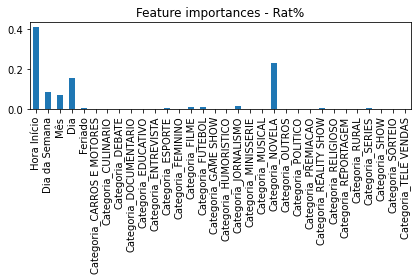

In [ ]:
%%time
modelo_RFR_rat_importances = pd.Series(modelo_RFR_rat.feature_importances_,X.columns)

fig, ax = plt.subplots()
modelo_RFR_rat_importances.plot.bar(ax=ax)
ax.set_title("Feature importances - Rat%")
fig.tight_layout()

CPU times: user 1.96 s, sys: 13.8 ms, total: 1.97 s
Wall time: 2.11 s


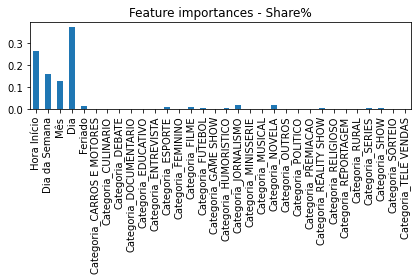

In [ ]:
%%time
modelo_RFR_share_importances = pd.Series(modelo_RFR_share.feature_importances_,X.columns)

fig, ax = plt.subplots()
modelo_RFR_share_importances.plot.bar(ax=ax)
ax.set_title("Feature importances - Share%")
fig.tight_layout()

CPU times: user 2.11 s, sys: 22.7 ms, total: 2.13 s
Wall time: 2.86 s


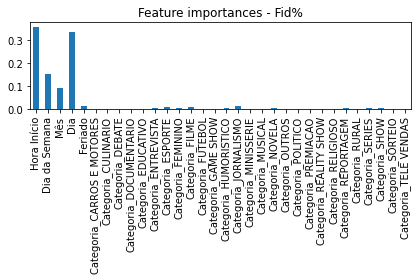

In [ ]:
%%time
modelo_RFR_fid_importances = pd.Series(modelo_RFR_fid.feature_importances_,X.columns)

fig, ax = plt.subplots()
modelo_RFR_fid_importances.plot.bar(ax=ax)
ax.set_title("Feature importances - Fid%")
fig.tight_layout()

### 5.4.4 Árvore de Decisão

In [ ]:
%%time
modelo_AD_rat = DecisionTreeRegressor()
modelo_AD_share = DecisionTreeRegressor()
modelo_AD_fid = DecisionTreeRegressor()

modelo_AD_rat.fit(X_train,y_train_rat)
modelo_AD_share.fit(X_train,y_train_share)
modelo_AD_fid.fit(X_train,y_train_fid)

y_pred_ad_train_rat = modelo_AD_rat.predict(X_train)
y_pred_ad_test_rat = modelo_AD_rat.predict(X_test)


y_pred_ad_train_share = modelo_AD_share.predict(X_train)
y_pred_ad_test_share = modelo_AD_share.predict(X_test)


y_pred_ad_train_fid = modelo_AD_fid.predict(X_train)
y_pred_ad_test_fid = modelo_AD_fid.predict(X_test)

CPU times: user 4.32 s, sys: 206 ms, total: 4.52 s
Wall time: 4.53 s


In [ ]:
%%time
# Rat Scores
ad_r2_score_train_rat = r2_score(y_train_rat, y_pred_ad_train_rat)
ad_r2_score_test_rat = r2_score(y_test_rat, y_pred_ad_test_rat)

ad_mean_train_score_rat = mean_squared_error(y_train_rat, y_pred_ad_train_rat)
ad_mean_test_score_rat = mean_squared_error(y_test_rat, y_pred_ad_test_rat)

# Share Scores
ad_r2_score_train_share = r2_score(y_train_share, y_pred_ad_train_share)
ad_r2_score_test_share = r2_score(y_test_share, y_pred_ad_test_share)

ad_mean_train_score_share = mean_squared_error(y_train_share, y_pred_ad_train_share)
ad_mean_test_score_share = mean_squared_error(y_test_share, y_pred_ad_test_share)


# Fid Scores
ad_r2_score_train_fid = r2_score(y_train_fid, y_pred_ad_train_fid)
ad_r2_score_test_fid = r2_score(y_test_fid, y_pred_ad_test_fid)

ad_mean_train_score_fid = mean_squared_error(y_train_fid, y_pred_ad_train_fid)
ad_mean_test_score_fid = mean_squared_error(y_test_fid, y_pred_ad_test_fid)



print("\n\n## Rat %")
print('Precisão (treino): ', ad_r2_score_train_rat)
print('Mean Squared Error (Treino): ', ad_mean_train_score_rat)
print('Precisão (teste): ', ad_r2_score_test_rat)
print('Mean Squared Error (teste): ', ad_mean_test_score_rat)

print("\n\n## share %")
print('Precisão (treino): ', ad_r2_score_train_share)
print('Mean Squared Error (Treino): ', ad_mean_train_score_share)
print('Precisão (teste): ', ad_r2_score_test_share)
print('Mean Squared Error (teste): ', ad_mean_test_score_share)

print("\n\n## fid %")
print('Precisão (treino): ', ad_r2_score_train_fid)
print('Mean Squared Error (Treino): ', ad_mean_train_score_fid)
print('Precisão (teste): ', ad_r2_score_test_fid)
print('Mean Squared Error (teste): ', ad_mean_test_score_fid)



## Rat %
Precisão (treino):  0.9889128421968543
Mean Squared Error (Treino):  0.16004108534213854
Precisão (teste):  0.9347700227692866
Mean Squared Error (teste):  0.9504110423119168


## share %
Precisão (treino):  0.9704873488829692
Mean Squared Error (Treino):  10.022730618795732
Precisão (teste):  0.8753318925804361
Mean Squared Error (teste):  41.94531514082136


## fid %
Precisão (treino):  0.8642734304934784
Mean Squared Error (Treino):  57.87704719871024
Precisão (teste):  0.5265645521656689
Mean Squared Error (teste):  211.23239564079495
CPU times: user 218 ms, sys: 3.96 ms, total: 222 ms
Wall time: 220 ms


CPU times: user 204 ms, sys: 4.76 ms, total: 209 ms
Wall time: 492 ms


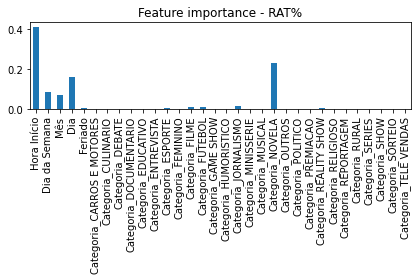

In [ ]:
%%time
modelo_AD_rat_importances = pd.Series(modelo_AD_rat.feature_importances_,X.columns)

fig, ax = plt.subplots()
modelo_AD_rat_importances.plot.bar(ax=ax)
ax.set_title("Feature importance - RAT%")
fig.tight_layout()

CPU times: user 199 ms, sys: 10 ms, total: 209 ms
Wall time: 435 ms


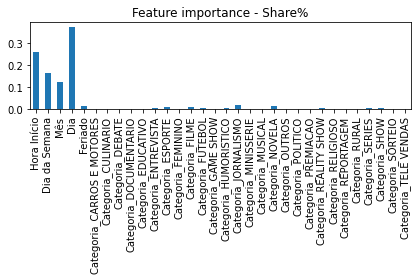

In [ ]:
%%time
modelo_AD_share_importances = pd.Series(modelo_AD_share.feature_importances_,X.columns)

fig, ax = plt.subplots()
modelo_AD_share_importances.plot.bar(ax=ax)
ax.set_title("Feature importance - Share%")
fig.tight_layout()

CPU times: user 194 ms, sys: 6.94 ms, total: 201 ms
Wall time: 208 ms


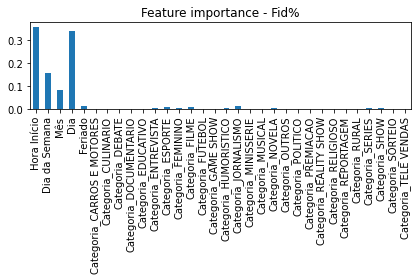

In [ ]:
%%time
modelo_AD_fid_importances = pd.Series(modelo_AD_fid.feature_importances_,X.columns)

fig, ax = plt.subplots()
modelo_AD_fid_importances.plot.bar(ax=ax)
ax.set_title("Feature importance - Fid%")
fig.tight_layout()

### 5.4.5 LightGBM Rat%

In [ ]:
%%time
modelo_lgbm = LGBMRegressor(learning_rate=0.09, max_depth=-8,random_state=42, n_estimators=30000)
modelo_lgbm.fit(X_train,y_train_rat['Total Domicílios | Rat%']
,eval_set=[(X_test,y_test_rat['Total Domicílios | Rat%']),(X_train,y_train_rat['Total Domicílios | Rat%'])],
          verbose=2,eval_metric='logloss')

A saída de streaming foi truncada nas últimas 5000 linhas.
[20006]	training's l2: 0.460249	valid_0's l2: 0.904536
[20008]	training's l2: 0.460227	valid_0's l2: 0.904515
[20010]	training's l2: 0.460222	valid_0's l2: 0.904508
[20012]	training's l2: 0.46021	valid_0's l2: 0.904499
[20014]	training's l2: 0.460166	valid_0's l2: 0.904437
[20016]	training's l2: 0.460147	valid_0's l2: 0.904406
[20018]	training's l2: 0.460126	valid_0's l2: 0.904401
[20020]	training's l2: 0.460114	valid_0's l2: 0.904377
[20022]	training's l2: 0.460097	valid_0's l2: 0.904364
[20024]	training's l2: 0.460072	valid_0's l2: 0.904333
[20026]	training's l2: 0.460064	valid_0's l2: 0.904332
[20028]	training's l2: 0.460057	valid_0's l2: 0.904332
[20030]	training's l2: 0.460036	valid_0's l2: 0.90431
[20032]	training's l2: 0.460028	valid_0's l2: 0.904314
[20034]	training's l2: 0.459962	valid_0's l2: 0.904245
[20036]	training's l2: 0.45995	valid_0's l2: 0.90423
[20038]	training's l2: 0.459926	valid_0's l2: 0.904215
[20040]	tr

LGBMRegressor(learning_rate=0.09, max_depth=-8, n_estimators=30000,
              random_state=42)

In [ ]:
%%time
test_pred_lgbm_rat = modelo_lgbm.predict(X_test)

In [ ]:
%%time
print("\n\n## Rat %")
print('Precisão (teste): ', r2_score(y_test_rat['Total Domicílios | Rat%'], test_pred_lgbm_rat))
print('Mean Squared Error (teste): ', mean_squared_error(y_test_rat['Total Domicílios | Rat%'], test_pred_lgbm_rat))



## Rat %
Precisão (teste):  0.9805028310867216
Mean Squared Error (teste):  0.8288552421201365


### 5.4.6 Comparação de Modelos Rat%

### 5.4.6.1 R2 Score
Valores Altos são melhores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


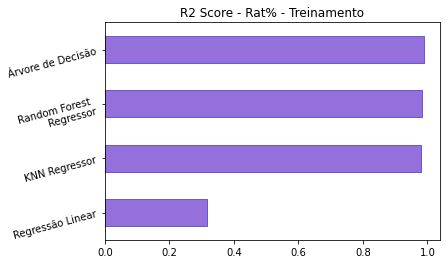

<Figure size 720x360 with 0 Axes>

CPU times: user 156 ms, sys: 3.06 ms, total: 159 ms
Wall time: 161 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_r2_score_train_rat,knn_r2_score_train_rat,rfr_r2_score_train_rat, ad_r2_score_train_rat],['Regressão Linear', 'KNN Regressor', 'Random Forest \n Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="R2 Score - Rat% - Treinamento", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("R2 Score - Rat% - Treinamento")
# fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


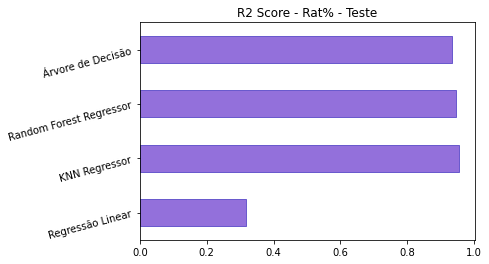

<Figure size 720x360 with 0 Axes>

CPU times: user 143 ms, sys: 11 ms, total: 154 ms
Wall time: 159 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_r2_score_test_rat,knn_r2_score_test_rat,rfr_r2_score_test_rat, ad_r2_score_test_rat],['Regressão Linear', 'KNN Regressor', 'Random Forest Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="R2 Score - Rat% - Teste", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("R2 Score - Rat% - Teste")
# fig.tight_layout()

### 5.4.6.2 Mean Absolute Error Score
Valores Baixos são melhores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


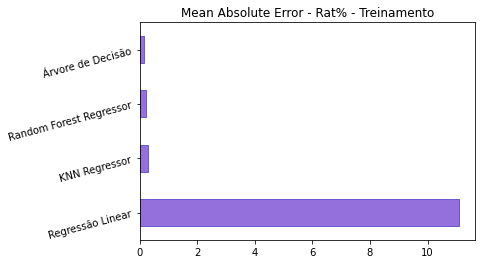

<Figure size 720x360 with 0 Axes>

CPU times: user 213 ms, sys: 9.15 ms, total: 222 ms
Wall time: 500 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_mean_train_score_rat,knn_mean_train_score_rat,rfr_mean_train_score_rat, ad_mean_train_score_rat],['Regressão Linear', 'KNN Regressor', 'Random Forest Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="Mean Absolute Error - Rat% - Treinamento", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("Mean Absolute Error - Rat% - Treinamento")
# fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


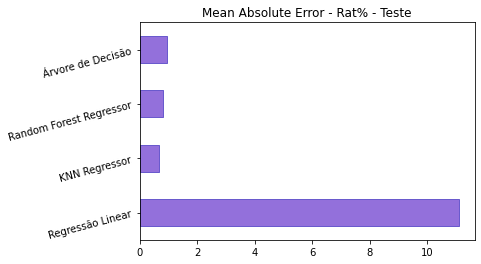

<Figure size 720x360 with 0 Axes>

CPU times: user 188 ms, sys: 9.04 ms, total: 197 ms
Wall time: 214 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_mean_test_score_rat,knn_mean_test_score_rat,rfr_mean_test_score_rat, ad_mean_test_score_rat],['Regressão Linear', 'KNN Regressor', 'Random Forest Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="Mean Absolute Error - Rat% - Teste", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("Mean Absolute Error - Rat% - Teste")
# fig.tight_layout()

### 5.4.7 Comparação de Modelos Share%

### 5.4.7.1 R2 Score
Valores Altos são melhores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


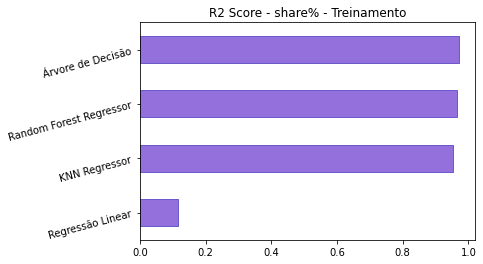

<Figure size 720x360 with 0 Axes>

CPU times: user 142 ms, sys: 2 ms, total: 144 ms
Wall time: 151 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_r2_score_train_share,knn_r2_score_train_share,rfr_r2_score_train_share, ad_r2_score_train_share],['Regressão Linear', 'KNN Regressor', 'Random Forest Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="R2 Score - share% - Treinamento", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("R2 Score - share% - Treinamento")
# fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


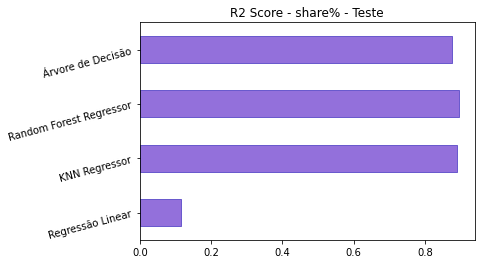

<Figure size 720x360 with 0 Axes>

CPU times: user 140 ms, sys: 2 ms, total: 142 ms
Wall time: 162 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_r2_score_test_share,knn_r2_score_test_share,rfr_r2_score_test_share, ad_r2_score_test_share],['Regressão Linear', 'KNN Regressor', 'Random Forest Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="R2 Score - share% - Teste", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("R2 Score - share% - Teste")
# fig.tight_layout()

### 5.4.7.2 Mean Absolute Error Score
Valores Baixos são melhores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


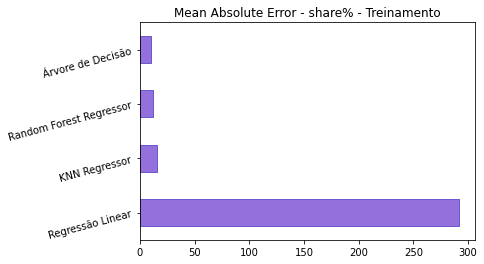

<Figure size 720x360 with 0 Axes>

CPU times: user 135 ms, sys: 10.9 ms, total: 146 ms
Wall time: 150 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_mean_train_score_share,knn_mean_train_score_share,rfr_mean_train_score_share, ad_mean_train_score_share],['Regressão Linear', 'KNN Regressor', 'Random Forest Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="Mean Absolute Error - share% - Treinamento", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("Mean Absolute Error - share% - Treinamento")
# fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


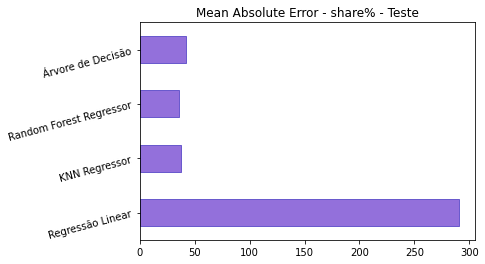

<Figure size 720x360 with 0 Axes>

CPU times: user 138 ms, sys: 7.02 ms, total: 145 ms
Wall time: 149 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_mean_test_score_share,knn_mean_test_score_share,rfr_mean_test_score_share, ad_mean_test_score_share],['Regressão Linear', 'KNN Regressor', 'Random Forest Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="Mean Absolute Error - share% - Teste", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("Mean Absolute Error - share% - Teste")
# fig.tight_layout()

### 5.4.8 Comparação de Modelos Fid%

### 5.4.8.1 R2 Score
Valores Altos são melhores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


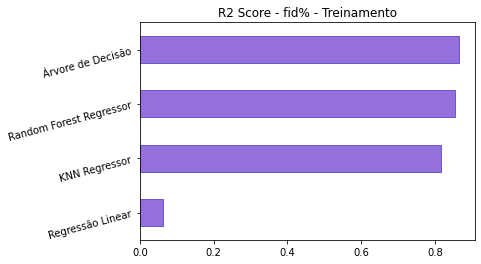

<Figure size 720x360 with 0 Axes>

CPU times: user 135 ms, sys: 5.02 ms, total: 140 ms
Wall time: 144 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_r2_score_train_fid,knn_r2_score_train_fid,rfr_r2_score_train_fid, ad_r2_score_train_fid],['Regressão Linear', 'KNN Regressor', 'Random Forest Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="R2 Score - fid% - Treinamento", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("R2 Score - fid% - Treinamento")
# fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


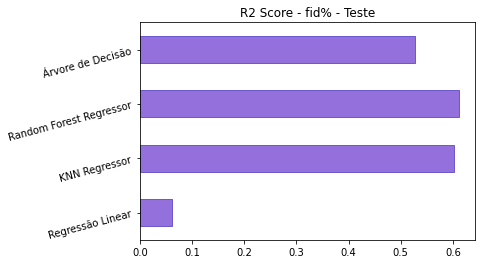

<Figure size 720x360 with 0 Axes>

CPU times: user 235 ms, sys: 8.98 ms, total: 244 ms
Wall time: 426 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_r2_score_test_fid,knn_r2_score_test_fid,rfr_r2_score_test_fid, ad_r2_score_test_fid],['Regressão Linear', 'KNN Regressor', 'Random Forest Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="R2 Score - fid% - Teste", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("R2 Score - fid% - Teste")
# fig.tight_layout()

### 5.4.8.2 Mean Absolute Error Score
Valores Baixos são melhores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


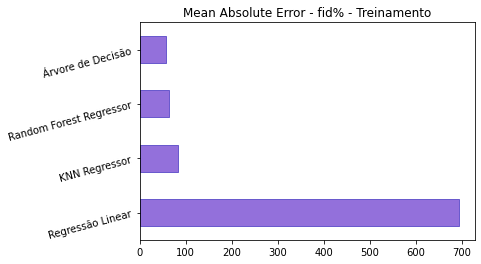

<Figure size 720x360 with 0 Axes>

CPU times: user 144 ms, sys: 4.2 ms, total: 148 ms
Wall time: 153 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_mean_train_score_fid,knn_mean_train_score_fid,rfr_mean_train_score_fid, ad_mean_train_score_fid],['Regressão Linear', 'KNN Regressor', 'Random Forest Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="Mean Absolute Error - fid% - Treinamento", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("Mean Absolute Error - fid% - Treinamento")
# fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


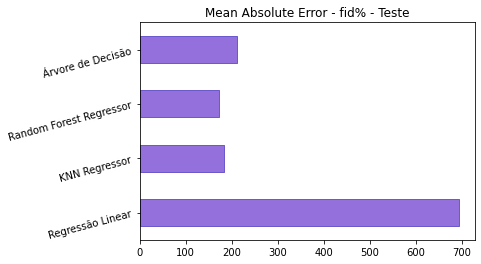

<Figure size 720x360 with 0 Axes>

CPU times: user 153 ms, sys: 8 ms, total: 161 ms
Wall time: 159 ms


In [ ]:
%%time
modelos_r2_score = pd.Series([linear_mean_test_score_fid,knn_mean_test_score_fid,rfr_mean_test_score_fid, ad_mean_test_score_fid],['Regressão Linear', 'KNN Regressor', 'Random Forest Regressor', 'Árvore de Decisão'])

modelos_r2_score.plot.barh(rot=15, title="Mean Absolute Error - fid% - Teste", color=['mediumpurple', 'mediumpurple', 'mediumpurple', 'mediumpurple'], edgecolor='slateblue');
ax = plt.axes()
ax.set_facecolor("white")
plt_1 = plt.figure(figsize=(10, 5))
plt.show(block=True);

# fig, ax = plt.subplots()
# modelos_r2_score.plot.bar(ax=ax)
# ax.set_title("Mean Absolute Error - fid% - Teste")
# fig.tight_layout()

## Teste de hiperparâmetros

### 6. Modelos

### 6.1 KNN

In [ ]:
# from sklearn.model_selection import GridSearchCV
# model = KNeighborsRegressor()

# parameters = {'n_neighbors': range(2,100)} 
# modelGS = GridSearchCV(model, parameters)

# modelGS.fit(X_train[:20000], y_train_rat[:20000])
# modelGS.best_params_

# from sklearn.model_selection import GridSearchCV
# model = KNeighborsRegressor()

# parameters = {'weights': ['uniform', 'distance']}
# modelGS = GridSearchCV(model, parameters)

# modelGS.fit(X_train[:20000], y_train_rat[:20000])
# modelGS.best_params_


# from sklearn.model_selection import GridSearchCV
# model = KNeighborsRegressor()

# parameters = {'algorithm': ['brute', 'kd_tree', 'ball_tree']}
# modelGS = GridSearchCV(model, parameters)

# modelGS.fit(X_train[:20000], y_train_rat[:20000])
# modelGS.best_params_




from sklearn.model_selection import RandomizedSearchCV
model = KNeighborsRegressor()

parameters = {'n_neighbors': range(2,100), 'weights': ['uniform', 'distance']}
modelRS = RandomizedSearchCV(model, parameters)

modelRS.fit(X_train, y_train_rat)
# modelRS.fit(X_train[:20000], y_train_rat[:20000])
modelRS.best_params_